In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import pyarrow.parquet as pq
import glob
import geopandas as gpd
import os
import numpy as np

In [ ]:
# List of Parquet files to be read and merged
parquet_files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_projected_als/southamerica_inpe_brazil3*.parquet')
parquet_files[1]

In [17]:
# Read each Parquet file into a DataFrame and store them in a list
dfs = [gpd.read_parquet(file) for file in parquet_files]
# Merge DataFrames in the list
merged_df = pd.concat(dfs, ignore_index=True)
# Print or further process the merged DataFrame
merged_df.head()

,orbit_info/sc_orient,root_file,root_beam,land_segments/delta_time,land_segments/terrain/h_te_best_fit,land_segments/canopy/n_ca_photons,land_segments/night_flag,land_segments/solar_elevation,land_segments/canopy/h_canopy_uncertainty,land_segments/terrain/h_te_median,land_segments/terrain/h_te_uncertainty,land_segments/canopy/h_canopy_20m,land_segments/latitude,land_segments/longitude,land_segments/latitude_20m,land_segments/longitude_20m,geometry,e,n,orientation
0,0,ATL08_20200523143227_08860714_006_01.h5,gt1l,7.547989e+07,233.762207,110,0,63.261147,6.195387,227.225143,16.424992,14.239273,-5.331411,-46.407848,-5.331770,-46.407810,POINT (344003.72323 9410484.05730),344003.723231,9.410484e+06,-9.902064
1,1,ATL08_20210521211146_08861114_006_01.h5,gt2r,1.068670e+08,218.773224,50,1,-5.328128,7.842581,219.581558,13.754072,10.636490,-5.331285,-46.410217,-5.331644,-46.410179,POINT (343741.14352 9410497.37668),343741.143523,9.410497e+06,-9.767939
2,1,ATL08_20200202075404_05740608_006_01.h5,gt3l,6.586533e+07,221.298569,23,1,-18.262314,26.926506,221.447250,20.128445,2.827148,-5.331802,-46.414787,-5.331622,-46.414772,POINT (343232.10697 9410498.68849),343232.106974,9.410499e+06,10.119959
3,0,ATL08_20190825033302_08860414_006_02.h5,gt3l,5.193952e+07,221.398376,54,1,-80.584282,4.521018,221.159241,4.027229,11.567047,-5.331193,-46.414738,-5.331553,-46.414703,POINT (343239.69978 9410506.24567),343239.699776,9.410506e+06,-10.740570
4,1,ATL08_20210521211146_08861114_006_01.h5,gt2r,1.068670e+08,218.773224,50,1,-5.328128,7.842581,219.581558,13.754072,7.761719,-5.331285,-46.410217,-5.331464,-46.410198,POINT (343738.98414 9410517.24924),343738.984141,9.410517e+06,-9.767939


In [25]:
len(merged_df)

184475

In [5]:
# bound files 
bounds_files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/out_bounds/southamerica_inpe_brazil3*.parquet')
bounds_files[1]

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/out_bounds/southamerica_inpe_brazil31976_NP_T-0480_0000001.parquet'

In [6]:
len(bounds_files)

7069

In [29]:
total_is2_in_laz = 0
for f in bounds_files:
    laz_gdf = gpd.read_parquet(f)
    polygon = laz_gdf.to_crs(laz_gdf.iloc[0]['epsg']).iloc[0]['geometry']
    is2laz = merged_df.clip(polygon)
    total_is2_in_laz += len(is2laz)

In [30]:
total_is2_in_laz

234943

In [42]:
files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/southamerica/inpe_brazil31973/rh*.parquet')
print(len(files))
files[1]

61


'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/southamerica/inpe_brazil31973/rh_NP_T-0383_0000004.parquet'

In [43]:
dfs = [pd.read_parquet(f) for f in files]   

In [44]:
res = pd.concat(dfs, ignore_index=True)

In [58]:
res

,rh0,rh1,rh2,rh3,rh4,rh5,rh6,rh7,rh8,rh9,...,rh95,rh96,rh97,rh98,rh99,rh100,h_canopy_98,land_segments/longitude_20m,land_segments/latitude_20m,land_segments/delta_time
0,-0.221331,-0.002058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.979040,22.288184,23.934984,25.114904,25.362134,25.646061,25.118336,-67.444244,0.638966,1.133392e+08
1,-0.577086,-0.424270,-0.422726,-0.389526,-0.373278,-0.289904,-0.267383,-0.260166,-0.225609,-0.143388,...,11.035252,11.500788,11.861218,12.475370,14.390609,19.701975,14.298967,-67.438881,0.639692,3.487131e+07
2,-0.549934,-0.148981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.078139,21.194932,21.307737,21.751901,22.463036,23.833224,21.798764,-67.438904,0.639872,3.487131e+07
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.667086,23.820537,23.915781,24.147050,24.514299,25.541924,24.147050,-67.438919,0.640054,3.487131e+07
4,-0.798358,-0.171335,-0.019295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.769517,23.476839,23.829872,24.034601,24.739454,25.611562,24.106896,-67.438972,0.640594,3.487131e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,-0.452464,-0.290253,-0.148029,-0.141930,-0.115947,-0.005764,0.000000,0.000000,0.000000,0.000000,...,6.346350,6.688862,6.906273,7.199028,9.516770,10.025283,8.680116,-68.122612,1.087710,1.397252e+08
782,-0.555558,-0.555558,-0.547253,-0.473891,-0.415914,-0.410499,-0.406678,-0.405954,-0.400477,-0.389255,...,1.506736,2.274079,2.706105,3.039990,3.142567,3.215615,3.196319,-68.121826,1.088154,1.397252e+08
783,-0.437532,-0.308585,-0.277671,-0.256796,-0.152516,-0.138842,-0.126115,-0.074703,0.000000,0.000000,...,7.510687,7.790139,8.458823,9.011077,9.185485,9.493204,9.055297,-68.122643,1.088072,1.397252e+08
784,-0.835113,-0.547214,-0.410598,-0.190441,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.431092,10.727813,10.790494,11.062651,11.484793,13.008686,11.151553,-68.122681,1.088432,1.397252e+08


In [46]:
len(res)

786

In [50]:
df=pd.read_parquet('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_calval_metrics/southamerica_inpe_brazil31973.parquet')

In [52]:
als_fs = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_als_stat/southamerica_inpe_brazil31973*.parquet')

In [54]:
dfs_als = [pd.read_parquet(f) for f in als_fs ]   
res_als = pd.concat(dfs_als, ignore_index=True)

In [56]:
res_als.columns

Index(['als_rh0', 'als_rh1', 'als_rh2', 'als_rh3', 'als_rh4', 'als_rh5',
       'als_rh6', 'als_rh7', 'als_rh8', 'als_rh9',
       ...
       'z_ground', 'ground_q0', 'ground_q25', 'ground_q50', 'ground_q75',
       'ground_q100', 'als_slope_degrees', 'land_segments/longitude_20m',
       'land_segments/latitude_20m', 'land_segments/delta_time'],
      dtype='object', length=111)

In [60]:
inpe_73 = pd.merge(res, res_als, on=['land_segments/latitude_20m', 'land_segments/longitude_20m', 'land_segments/delta_time'])

In [59]:
total_is2 = pd.read_parquet('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_20m_cal_val_12262023.parquet')

In [61]:
inpe_73_final = pd.merge(total_is2, inpe_73, on=['land_segments/latitude_20m', 'land_segments/longitude_20m', 'land_segments/delta_time'])
inpe_73_final

,orbit_info/sc_orient,root_file,root_beam,land_segments/delta_time,land_segments/terrain/h_te_best_fit,land_segments/canopy/n_ca_photons,land_segments/night_flag,land_segments/solar_elevation,land_segments/canopy/h_canopy_uncertainty,land_segments/terrain/h_te_median,...,als_rh98,als_rh99,als_rh100,z_ground,ground_q0,ground_q25,ground_q50,ground_q75,ground_q100,als_slope_degrees
0,0,ATL08_20220504060556_06441501_006_01.h5,gt3l,1.368796e+08,76.638123,52,1,-60.664246,1.992604e+00,7.657461e+01,...,19.415615,19.867915,20.645615,71.424385,71.00,71.1700,71.335,71.6275,72.22,14.615547
1,1,ATL08_20210321132920_13371007_006_01.h5,gt1r,1.015690e+08,82.694618,108,0,44.951160,3.402823e+38,3.402823e+38,...,21.178947,21.443647,22.518947,77.231053,76.93,77.1550,77.220,77.2600,77.88,1.811151
2,1,ATL08_20210321132920_13371007_006_01.h5,gt1r,1.015690e+08,84.855331,93,0,44.951199,3.402823e+38,3.402823e+38,...,22.915217,23.189217,23.965217,76.774783,76.51,76.6825,76.780,76.8675,77.13,0.286538
3,0,ATL08_20230502124510_06441901_006_01.h5,gt1l,1.682667e+08,75.127495,77,0,33.264359,4.426552e+00,7.524253e+01,...,22.896418,24.019118,24.471818,70.208182,69.82,69.9750,70.080,70.3750,71.37,5.063381
4,1,ATL08_20210505232624_06441101_006_01.h5,gt3r,1.054924e+08,74.571205,83,1,-14.320661,2.434919e+00,7.460352e+01,...,14.959652,16.303152,18.668852,69.081148,68.88,69.0000,69.060,69.1300,69.59,3.082666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,0,ATL08_20190208142818_06440201_006_02.h5,gt1l,3.487131e+07,81.757492,129,0,53.064449,1.462376e+00,8.061748e+01,...,17.859259,18.354259,19.439259,76.800741,76.34,76.6100,76.725,76.9200,77.86,3.492548
759,0,ATL08_20230502124510_06441901_006_01.h5,gt3l,1.682667e+08,86.530045,92,0,33.467560,3.402823e+38,3.402823e+38,...,20.525525,20.870325,21.508125,82.971875,82.31,82.7575,82.985,83.1925,83.82,8.701718
760,1,ATL08_20220819125241_08951607_006_01.h5,gt1r,1.461492e+08,87.153221,64,0,35.714691,3.402823e+38,3.402823e+38,...,24.648588,25.092588,25.970588,81.979412,81.73,81.8900,81.970,82.0500,82.26,2.024868
761,1,ATL08_20220819125241_08951607_006_01.h5,gt1r,1.461492e+08,88.657097,85,0,35.719746,2.657477e+00,8.861465e+01,...,23.791000,24.990600,26.620000,83.810000,83.46,83.6875,83.775,83.9450,84.42,2.024992


In [70]:
#jpl_borneo_013
#!/usr/bin/env python
# coding: utf-8
import glob
import pyproj
import os
import geopandas as gpd
import pandas as pd
import re
import sys
import argparse
import matplotlib.pyplot as plt
import numpy as np
import datashader as ds
from datashader.mpl_ext import dsshow

def get_project_simulation_results(region, name):
    data_sim = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/' + region + '/' + name + '/rh_*.parquet'
    files = glob.glob(data_sim)
    res = []
    for f in files:
        #print(f)
        match = re.search(r'rh_(.*?)\.parquet', f).group(1)
        #print(match)
        df = pd.read_parquet(f)
        df.dropna(inplace=True)
        df['laz'] = match
        if len(df) >0: res.append(df)
    if len(res) == 0: return
    df_is2_sim = pd.concat(res, ignore_index=True)
    return df_is2_sim

def get_project_als_stats(region, name):
    data_path = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_als_stat/'+ region + '_' +name + '*.parquet'
    files = glob.glob(data_path)
    res = []
    for f in files:
        match = re.search(f'{name}_(.*?)\.parquet', f).group(1)
        #print(match)
        df = pd.read_parquet(f)
        df.dropna(inplace=True)
        df['laz'] = match
        if len(df) >0: res.append(df)
    if len(res) == 0: return
    df_is2_als = pd.concat(res, ignore_index=True)
    return df_is2_als

def get_stat(x,y):
    corr_matrix = np.corrcoef(x, y)
    corr = corr_matrix[0,1]
    R_sq= corr**2
    N = len(x)
    # Calculate the squared differences
    squared_diff = (x -y)**2
    # Calculate the mean squared difference
    mean_squared_diff = np.mean(squared_diff)
    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_diff)
    return R_sq, rmse, N

def get_x_y(row,col, final):
            filtered_df = final[final['land_segments/canopy/h_canopy_20m'] < 120]
            if len(filtered_df) < 2: return
            y = filtered_df['land_segments/canopy/h_canopy_20m']
            if row ==0 and col == 0:
                x = filtered_df['als_rh98']
                return x, y, 'als_rh98'
            if row ==0 and col == 1:
                x = filtered_df['rh98']
                return x, y, 'rh98'
            if row ==0 and col == 2:
                x = filtered_df['h_canopy_98']
                return x, y, 'h_canopy_98'
            filtered_df = filtered_df[filtered_df['land_segments/night_flag'] >0 ]
            filtered_df = filtered_df[filtered_df['Strong_flag'] == True ]
            if len(filtered_df) < 2: return
            y = filtered_df['land_segments/canopy/h_canopy_20m']
            if row ==1 and col == 0:
                x = filtered_df['als_rh98']
                return x, y,'als_rh98'
            if row ==1 and col == 1:
                x = filtered_df['rh98']
                return x, y, 'rh98'
            if row ==1 and col == 2:
                x = filtered_df['h_canopy_98']
                return x, y, 'h_canopy_98'
def plot_metrics(final, region, name):
        fig, axs = plt.subplots(2, 3, figsize=(11, 5))
        #cmaps = ['RdBu_r', 'viridis', 'viridis']
        for col in range(3):
            for row in range(2):
                ax = axs[row, col]    
                try:
                    x,y, x_var=get_x_y(row, col, final)
                except Exception as e:
                    print('no data!')
                    continue
                R_sq, rmse, N = get_stat(x,y)
                #pcm = ax.hist2d(x, y, bins=(50, 50), cmap='Reds', vmax = 40, range=[[0,100],[0,100]])# xmin, xmax, ymin, ymax
                #ax.scatter(x, y, color='blue', marker='o', label='IS2 points', s=0.5)
                pcm = using_datashader(ax, x, y)
                #norm =  density_scatter( x, y, ax = ax,  bins = [30,30])
                ax.text(0.1, 0.9, f'$R^2$={round(R_sq, 2)}', transform=ax.transAxes, fontsize=10, va='top')
                ax.text(0.1, 0.8, f'RMSE={round(rmse, 2)}', transform=ax.transAxes, fontsize=10, va='top')
                ax.text(0.1, 0.7, f'N={N}', transform=ax.transAxes, fontsize=10, va='top')
                # Add labels and title
                if ax in axs[1,:]:
                    ax.set_xlabel(x_var)
                    ax.text(0.8, 0.9, f'S+N', transform=ax.transAxes, fontsize=10, va='top')
                if ax in axs[:,0]:
                    ax.set_ylabel('IS2 h_canopy_20m')
                #plt.title('Height comparison')
                ax.set_xlim(0,80)
                ax.set_ylim(0,80)     
        fig.colorbar(pcm, ax=axs[:,:], shrink=0.9)
        plt.show()
        plt.close()


def using_datashader(ax, x, y):
    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=20,
        norm="linear",
        aspect="auto",
        ax=ax,
        x_range = [0, 100], 
        y_range = [0, 100],
        plot_width=100,
        plot_height=100,
        #cmap='Reds',
    )
    return dsartist


#### save plot 

In [64]:
f_out = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_calval_metrics/seasia_jpl_borneo_013.parquet'
final = gpd.read_parquet(f_out)
final

,orbit_info/sc_orient,root_file,root_beam,land_segments/delta_time,land_segments/terrain/h_te_best_fit,land_segments/canopy/n_ca_photons,land_segments/night_flag,land_segments/solar_elevation,land_segments/canopy/h_canopy_uncertainty,land_segments/terrain/h_te_median,...,als_rh99,als_rh100,z_ground,ground_q0,ground_q25,ground_q50,ground_q75,ground_q100,als_slope_degrees,Strong_flag
0,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,57.361721,94,0,55.094135,2.373102e+00,5.752380e+01,...,24.905184,27.148784,11.131216,10.63,11.00,11.12,11.2400,11.77,78.698620,True
1,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,57.361721,94,0,55.094135,2.373102e+00,5.752380e+01,...,21.319357,22.723357,11.116643,10.76,10.99,11.10,11.2100,11.90,78.655671,True
2,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,62.229374,69,0,55.093395,3.402823e+38,3.402823e+38,...,21.277844,29.081044,11.098956,10.70,10.95,11.06,11.2000,11.93,71.743573,True
3,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,59.944855,54,0,55.095097,3.402823e+38,3.402823e+38,...,25.899210,27.094710,11.245290,10.95,11.14,11.21,11.3400,11.79,77.222233,True
4,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,57.361721,94,0,55.094135,2.373102e+00,5.752380e+01,...,24.103333,26.987733,11.122267,10.69,10.96,11.09,11.2725,11.87,77.610661,True
5,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,58.133846,111,0,55.094509,2.637666e+00,5.742167e+01,...,27.029683,28.669683,11.150317,10.88,11.04,11.11,11.2200,11.85,79.595575,True
6,0,ATL08_20220424062643_04911508_006_02.h5,gt3l,1.360168e+08,58.133846,111,0,55.094509,2.637666e+00,5.742167e+01,...,26.813339,28.628139,11.121861,10.84,11.01,11.10,11.2100,11.85,44.956958,True


## Making plots...
no data!
no data!
no data!


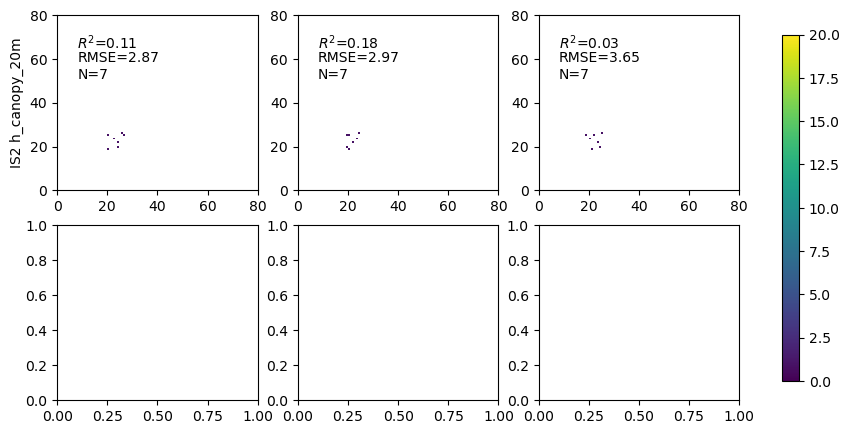

In [71]:
print('## Making plots...')
plot_metrics(final, 'seasia', 'jpl_borneo_013')

In [78]:
48/33*1191

1732.3636363636365

In [80]:
4/1.89

2.1164021164021167

In [10]:
### rmse vs terrain slope 
### where is the data?
data_files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_calval_metrics/*.parquet')
data_files[100]

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_calval_metrics/europe_spain_leonposada.parquet'

In [13]:
region = os.path.basename(data_files[100])[:-8].split('_')[0]

In [16]:
os.path.basename(data_files[100])[:-8].replace(region+'_','')

'spain_leonposada'

,orbit_info/sc_orient,root_file,root_beam,land_segments/delta_time,land_segments/terrain/h_te_best_fit,land_segments/canopy/n_ca_photons,land_segments/night_flag,land_segments/solar_elevation,land_segments/canopy/h_canopy_uncertainty,land_segments/terrain/h_te_median,...,als_rh99,als_rh100,z_ground,ground_q0,ground_q25,ground_q50,ground_q75,ground_q100,als_slope_degrees,Strong_flag
0,1,ATL08_20210527210614_09781108_006_01.h5,gt1r,1.073850e+08,270.019104,7,1,-5.725860,2.505882,269.868713,...,15.966512,17.305812,220.854188,220.70,220.82,220.86,220.88,221.38,73.020371,True
1,1,ATL08_20210527210614_09781108_006_01.h5,gt1r,1.073850e+08,269.632111,14,1,-5.725510,3.140178,269.635712,...,17.776142,20.116142,220.663858,220.58,220.64,220.66,220.68,221.16,73.117667,True
2,1,ATL08_20210527210614_09781108_006_01.h5,gt1r,1.073850e+08,269.381805,23,1,-5.725155,3.371312,269.385895,...,19.527571,20.607571,220.422429,220.32,220.40,220.42,220.44,220.99,84.764093,True
3,0,ATL08_20200529142654_09780708_006_01.h5,gt1l,7.599782e+07,275.896057,39,1,-76.463150,2.853875,275.890381,...,20.281377,21.317877,227.372123,227.25,227.34,227.37,227.39,227.90,0.573061,True
4,0,ATL08_20200529142654_09780708_006_01.h5,gt1l,7.599782e+07,275.896057,39,1,-76.463150,2.853875,275.890381,...,20.008490,21.197890,227.322110,227.22,227.30,227.32,227.34,227.77,0.573061,True


In [24]:
# write to a sing file 
# Read each Parquet file into a DataFrame and store them in a list
df_list = []
for f in data_files:
    df = pd.read_parquet(f)
    #if len(df) < 1000: continue
    region_name =  os.path.basename(f)[:-8]
    df.insert(0 , 'region', region_name.split('_')[0])
    df.insert(1, 'site_name', region_name.replace(region+'_',''))
    df_list.append(df)
# Merge DataFrames in the list
is2_calval = pd.concat(df_list, ignore_index=True)

In [25]:
print(len(is2_calval))

2106099


In [20]:
is2_calval.columns.values

array(['region', 'site_name', 'orbit_info/sc_orient', 'root_file',
       'root_beam', 'land_segments/delta_time',
       'land_segments/terrain/h_te_best_fit',
       'land_segments/canopy/n_ca_photons', 'land_segments/night_flag',
       'land_segments/solar_elevation',
       'land_segments/canopy/h_canopy_uncertainty',
       'land_segments/terrain/h_te_median',
       'land_segments/terrain/h_te_uncertainty',
       'land_segments/canopy/h_canopy_20m', 'land_segments/latitude',
       'land_segments/longitude', 'land_segments/latitude_20m',
       'land_segments/longitude_20m', 'geometry', 'rh0', 'rh1', 'rh2',
       'rh3', 'rh4', 'rh5', 'rh6', 'rh7', 'rh8', 'rh9', 'rh10', 'rh11',
       'rh12', 'rh13', 'rh14', 'rh15', 'rh16', 'rh17', 'rh18', 'rh19',
       'rh20', 'rh21', 'rh22', 'rh23', 'rh24', 'rh25', 'rh26', 'rh27',
       'rh28', 'rh29', 'rh30', 'rh31', 'rh32', 'rh33', 'rh34', 'rh35',
       'rh36', 'rh37', 'rh38', 'rh39', 'rh40', 'rh41', 'rh42', 'rh43',
       'rh44', 'rh45'

In [26]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
# Create a GeoDataFrame by converting latitude and longitude to a geometry column
geometry = [Point(xy) for xy in zip(is2_calval['land_segments/longitude_20m'], is2_calval['land_segments/latitude_20m'])]
gdf = gpd.GeoDataFrame(is2_calval, geometry=geometry, crs="EPSG:4326")

In [27]:
gdf.to_parquet('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/report/is2_calval_stat_v20240129.parquet')

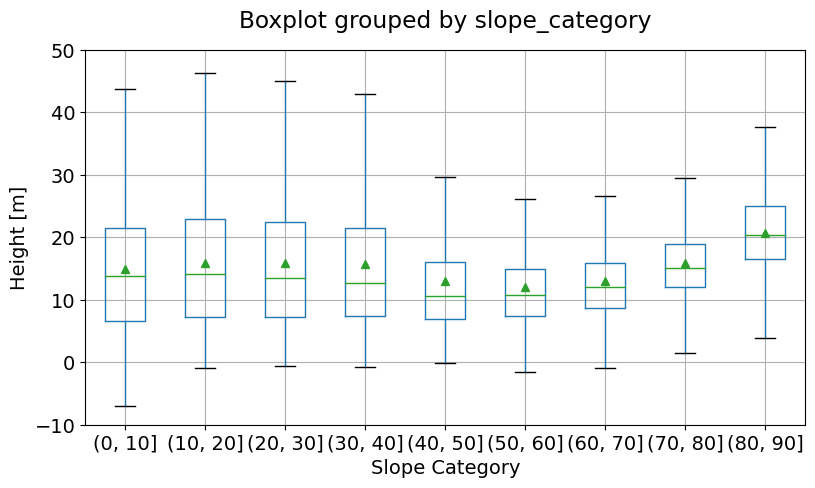

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
# Create bins for every 10 degrees
bins = range(0, 100, 10)
tmp['slope_category'] = pd.cut(tmp['als_slope_degrees'], bins)
# Create a boxplot for each category
plt.figure(figsize=(9, 5))
# Create boxplot with counts
ax = plt.axes()# Set the title
bp = tmp.boxplot(column='als_rh98', by='slope_category', vert=True, sym='', showmeans=True, ax=ax, showfliers=False)
# Set title for the box plot
bp.set_title('')
plt.ylabel('Height [m]')
plt.ylim(-10, 50)
plt.xlabel('Slope Category')
#plt.title('IS2 error vs slope')
plt.show()

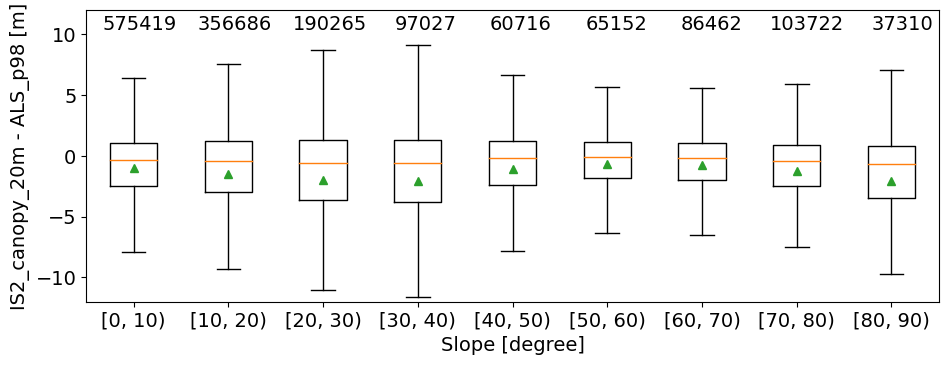

In [137]:
x=tmp['als_slope_degrees']
y=tmp['dif']
classes=10
bin_edges = np.linspace(0, 100, classes+1)
# Use np.histogram to get the data counts in each bin
data_counts, _ = np.histogram(x, bins=bin_edges)
# Create a list of data for each interval (bin)
data_list = [y[(x >= bin_edges[i]) & (x < bin_edges[i + 1])] for i in range(classes)]
data_list=data_list[:9]
# Set the font size for all elements
font_size = 14
plt.rcParams.update({'font.size': font_size})
# Create the box plot
plt.figure(figsize=(11, 4))  # Optional: Set the figure size
plt.boxplot(data_list, labels=[f'[{bin_edges[i]:.0f}, {bin_edges[i+1]:.0f})' for i in range(len(data_list))], 
            showfliers=False, showmeans=True) 
# Add annotations for the number of samples in each group
count = 1
for i in data_list:
    num_samples = len(i)
    plt.text( count*0.112 - 0.05,  0.95, # cover
         f'{num_samples}', transform=plt.gca().transAxes,
         horizontalalignment='center', verticalalignment='center')
    count = count + 1
# Set plot title and labels
#plt.title('Box Plot')
plt.ylim(-12, 12)  # y-axis limits from 0 to 35
plt.xlabel('Slope [degree]')
plt.ylabel('IS2_canopy_20m - ALS_p98 [m]')
plt.subplots_adjust(bottom=0.15) #left=0.1, right=0.9, top=0.9, 
# Show the plot
plt.show()

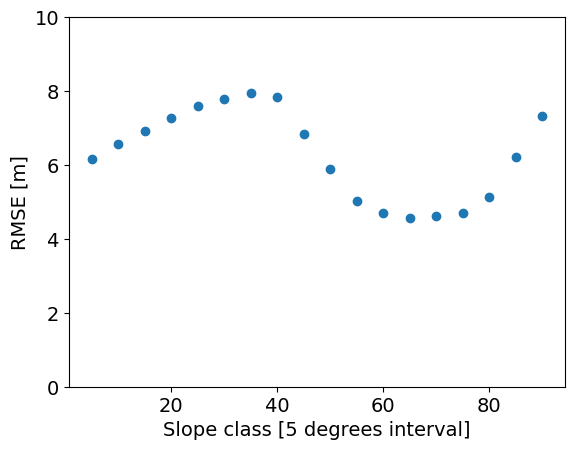

In [105]:
# Create a scatter plot
plt.scatter(x, y)
# Add labels and title
plt.xlabel('Slope class [5 degrees interval]')
plt.ylabel('RMSE [m]')
plt.ylim(0, 10)
# Show the plot
plt.show()

In [ ]:
# PFT type MODIS/Terra+Aqua Land Cover Type Yearly L3 Global 500 m SIN Grid
# 

In [11]:
import pandas as pd

df1 = pd.DataFrame({
    'col1': [1, 2, 3, 4],
    'col2': ['A', 'B', 'C', 'D'],
    'col3': ['X', 'Y', 'Z', 'W'],
    'data1': [10, 20, 30, 40]
})

df2 = pd.DataFrame({
    'col1': [1, 2, 3, 4, 3, 3],
    'col2': ['A', 'B', 'C', 'D', 'C', 'C'],
    'col3': ['X', 'Y', 'Z', 'W', 'Z', 'Z'],
    'data2': [100, 200, 300, 400, 600, 700]
})
merged_df = pd.merge(df1, df2, on=['col1', 'col2', 'col3'])
print(merged_df)

   col1 col2 col3  data1  data2
0     1    A    X     10    100
1     2    B    Y     20    200
2     3    C    Z     30    300
3     3    C    Z     30    600
4     3    C    Z     30    700
5     4    D    W     40    400


In [24]:
import pandas as pd

# Create a sample data frame with a column of values ranging from 0 to 100
data = pd.DataFrame({'values': range(105)})

# Define the bin edges
bins = list(range(-5, 101, 5))  

# Use pd.cut to bin the values
data['bins'] = pd.cut(data['values'], bins, right = False)

print(data)


     values        bins
0         0  [0.0, 5.0)
1         1  [0.0, 5.0)
2         2  [0.0, 5.0)
3         3  [0.0, 5.0)
4         4  [0.0, 5.0)
..      ...         ...
100     100         NaN
101     101         NaN
102     102         NaN
103     103         NaN
104     104         NaN

[105 rows x 2 columns]


In [1]:
# test 
import pandas as pd

# Assuming df is your DataFrame containing the data
# Example DataFrame
data = {
    'slope': [1, 2, 1, 2, 3, 3],
    'cover': ['A', 'B', 'A', 'B', 'C', 'C'],
    'strata': ['X', 'X', 'Y', 'Y', 'X', 'X']
}

df = pd.DataFrame(data)

# Grouping by 'slope', 'cover', and 'strata' columns and counting the number of samples in each group
grouped_df = df.groupby(['slope', 'cover', 'strata']).size().reset_index(name='number_of_samples')

print(grouped_df)


   slope cover strata  number_of_samples
0      1     A      X                  1
1      1     A      Y                  1
2      2     B      X                  1
3      2     B      Y                  1
4      3     C      X                  2


# test lasinfo txt reading 

In [35]:
import re
out_txt='../data/lasinfo_txt/africa_csir_ireagh_tile_29920_-2750680_utm.txt'
with open(out_txt, 'r') as file:
# Read and print each line
    for line in file:
        if 'min x y z: ' in line:
                
                words = line.split()
                xmin = words[4]
                ymin = words[5]
        if 'max x y z: ' in line:
             
                words = line.split()
                xmax = words[4]
                ymax = words[5]

        if 'key 3072 tiff_tag_location 0 count 1 value_offset' in line: # if defined ..
                pattern = re.compile(r'key 3072 tiff_tag_location 0 count 1 value_offset (.*?) - ProjectedCSTypeGeoKey')
                epsg_number = pattern.findall(line)[0]
        # edge case  GDA2020 / MGA zone 59 - EPSG:7859 in austalia
        if 'AUTHORITY[' in line:
                pattern = re.compile(r'AUTHORITY\["EPSG",(\d+)\]\]')
                epsg_number_2 = pattern.findall(line)[0]
                print('\n EPSG code is directly in line!',epsg_number_2)


 EPSG code is directly in line! 32736


In [38]:
epsg_number

NameError: name 'epsg_number' is not defined

In [39]:
# read all als projects

In [44]:
gdf = gpd.read_parquet('../data/all_sites_20231218.parquet')

In [62]:
gdf[gdf.name == 'david_test']

,region,name,area_ha,epsg,geometry
444,centralamerica,david_test,2372.234597,32617,"POLYGON ((-79.85338 9.13903, -79.86247 9.13903..."


In [50]:
# get all project names 

In [51]:
file ='../data/epsg_als_projects.txt'

In [54]:
names = []
with open(file, 'r') as f:
    for line in f:
        names.append(line.split()[1])

In [57]:
for i in  gdf.name:
   if i not in names:
       print(i)

nsw_coffsharbour
nsw_merimbula
nsw_portmacquarie4
nsw_casino
nsw_portmacquarie1
csir_limpopo
nsw_armidale
neon_serc
nasa_laselva_2006
nsw_portmacquarie3
nsw_portmacquarie2
nsw_taree
david_test


# check zero area laz file 

In [ ]:
# usa_usda_me_me_85_95.parquet

In [4]:
lazbound = gpd.read_parquet('../data/laz_bounds/usa_usda_me_me_85_95.parquet')

In [5]:
lazbound

,region,name,area_ha,epsg,geometry
0,usa,usda_me,0.0,26919,"POLYGON ((-69.37671 46.33717, -69.37671 46.337..."


In [6]:
!cat ../data/lasinfo_txt/usa_usda_me_me_85_95.txt

reporting all LAS header entries:
  file signature:             'LASF'
  file source ID:             11018
  global_encoding:            1
  project ID GUID data 1-4:   00000000-0000-0000-0000-000000000000
  version major.minor:        1.2
  system identifier:          'LAStools (c) by rapidlasso GmbH'
  generating software:        'las2las (version 210117)'
  file creation day/year:     49/2015
  header size:                227
  offset to point data:       503
  number var. length records: 2
  point data format:          1
  point data record length:   28
  number of point records:    1
  number of points by return: 1 0 0 0 0
  scale factor x y z:         0.001 0.001 0.001
  offset x y z:               0 5000000 0
  min x y z:                  471008.120 5131579.240 282.790
  max x y z:                  471008.120 5131579.240 282.790
variable length header record 1 of 2:
  reserved             0
  user ID              'LASF_Projection'
  record ID            34735
  length after head

In [18]:
# test cmds 
def get_sim_cmds(names, overwrite_wave=False): 
    all_als_lists= glob.glob(RES_PATH+'/*/*/alslist*.txt')
    cmds = []
    print(len(all_als_lists))
    for alsfile in all_als_lists:
        name = alsfile.split('/')[-2]
        if name not in names: continue
        out_coord = alsfile.replace('alslist' , 'coordinates')
        out_wave =  alsfile.replace('alslist', 'wave')[:-4] + '.h5'
        out_sim_log = alsfile.replace('alslist','sim_log') 
        if not os.path.exists(out_wave) or overwrite_wave: # waveform not exist, run simulation; ovewrite= true, run simulation.
            cmd = f'gediRat -fSigma 2.75 -readPulse {Pulse_PATH} -inList {alsfile} -listCoord {out_coord}  -output {out_wave} -hdf  -ground > {out_sim_log}'
            cmds.append(cmd)
    return cmds

In [3]:
VALID_SITES = ['amani','csir_agincourt', 'csir_dnyala', 'csir_ireagh', 'csir_justicia', 'csir_venetia', 'csir_welverdient', 'drc_ghent_field_32635', 
               'drc_ghent_field_32733', 'drc_ghent_field_32734', 'gsfc_mozambique', 'jpl_lope', 'jpl_rabi', 'tanzania_wwf_germany', 'khaoyai_thailand', 
               'chowilla', 'credo', 'karawatha', 'litchfield', 'rushworth_forests', 'tern_alice_mulga', 'tern_robson_whole', 'costarica_laselva2019', 
               'skidmore_bayerischer', 'zofin_180607', 'spain_exts1', 'spain_exts2', 'spain_exts3', 'spain_exts4', 'spain_leonposada', 'spain_leon1', 
               'spain_leon2', 'spain_leon3', 'jpl_borneo_004', 'jpl_borneo_013', 'jpl_borneo_040', 'jpl_borneo_119', 'jpl_borneo_144', 'chave_paracou', 
               'embrapa_brazil_2020_and_a01', 'embrapa_brazil_2020_bon_a01', 'embrapa_brazil_2020_cau_a01', 'embrapa_brazil_2020_duc_a01', 
               'embrapa_brazil_2020_hum_a01', 'embrapa_brazil_2020_par_a01', 'embrapa_brazil_2020_rib_a01', 'embrapa_brazil_2020_tal_a01',
               'embrapa_brazil_2020_tan_a01', 'embrapa_brazil_2020_tap_a01', 'embrapa_brazil_2020_tap_a04', 'walkerfire_20191007', 
               'neon_abby2018', 'neon_abby2019', 'neon_abby2021', 'neon_bart2018', 'neon_bart2019', 'neon_blan2019', 'neon_blan2021', 
               'neon_clbj2018', 'neon_clbj2019', 'neon_clbj2021', 'neon_clbj2021', 'neon_dela2018', 'neon_dela2019', 'neon_dela2021', 
               'neon_dsny2018', 'neon_dsny2021', 'neon_grsm2018', 'neon_grsm2021', 'neon_guan2018', 'neon_harv2018', 'neon_harv2019', 
               'neon_jerc2019', 'neon_jerc2021', 'neon_jorn2018', 'neon_jorn2019', 'neon_jorn2021', 'neon_konz2019', 'neon_konz2020', 
               'neon_leno2018', 'neon_leno2019', 'neon_leno2021', 'neon_mlbs2018', 'neon_mlbs2021', 'neon_moab2018', 'neon_moab2021', 
               'neon_niwo2019', 'neon_niwo2020', 'neon_nogp2021', 'neon_onaq2019', 'neon_onaq2021', 'neon_osbs2018', 'neon_osbs2019', 
               'neon_osbs2021', 'neon_puum2020', 'neon_rmnp2018', 'neon_rmnp2020', 'neon_scbi2019', 'neon_scbi2021', 'neon_serc2019', 
               'neon_serc2021', 'neon_sjer2019', 'neon_soap2018', 'neon_soap2019', 'neon_soap2021', 'neon_srer2019', 'neon_srer2021', 
               'neon_stei2019', 'neon_stei2020', 'neon_ster2021', 'neon_tall2018', 'neon_tall2019', 'neon_tall2021', 'neon_teak2021', 
               'neon_ukfs2018', 'neon_ukfs2019', 'neon_ukfs2020', 'neon_unde2019', 'neon_unde2020', 'neon_wood2021', 'neon_wref2019', 
               'neon_wref2021', 'neon_yell2018', 'neon_yell2019', 'neon_yell2020', 
               'neon_blan2022', 'neon_clbj2022', 'neon_grsm2022', 'neon_moab2022', 'neon_onaq2022', 'neon_rmnp2022', 'neon_serc2022', 
               'neon_stei2022', 'neon_steicheq2022', 'neon_ster2022', 'neon_unde2022', 'inpe_brazil31983', 'inpe_brazil31981', 
               'inpe_brazil31979', 'inpe_brazil31976', 'inpe_brazil31975', 'inpe_brazil31973', 'inpe_brazil31974', 'inpe_brazil31978', 
               'csir_limpopo','jrsrp_ilcp2015_wholeq6']

In [4]:
ALS_SITES = "/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/all_sites_20231218.parquet"
gdf_als = gpd.read_parquet(ALS_SITES)
regions = []
names = []
for index, row in gdf_als.iterrows(): 
    if row['name'] not in VALID_SITES: continue 
    regions.append( row['region'] )
    names.append(row['name'])    

In [11]:
len(names)

147

In [9]:
FOLDER_PROJ = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_projected_als'
LAS_PATH = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/las'
LAZ_PATH = '/gpfs/data1/vclgp/data/gedi/imported'
RES_PATH = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_simV2' # default output.
Pulse_PATH = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/20190821.gt1l.pulse' # from Amy
IS2_20M_FILE = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/is2_20m_cal_val_12262023.parquet'
ALS_SITES = "/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/all_sites_20231218.parquet"

In [19]:
all_cmds = get_sim_cmds(names)

15385


In [20]:
len(all_cmds)

13798

In [15]:
all_cmds[1]

'gediRat -fSigma 2.75 -readPulse /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/20190821.gt1l.pulse -inList /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_simV2/australia/tern_robson_whole/alslist_ATL08_20211209225004_11981314_006_01_gt1r.txt -listCoord /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_simV2/australia/tern_robson_whole/coordinates_ATL08_20211209225004_11981314_006_01_gt1r.txt  -output /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_simV2/australia/tern_robson_whole/wave_ATL08_20211209225004_11981314_006_01_gt1r.h5 -hdf  -ground > /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result_simV2/australia/tern_robson_whole/sim_log_ATL08_20211209225004_11981314_006_01_gt1r.txt'

In [16]:
files = glob.glob(RES_PATH+'/*/*/alslist*.txt')

In [17]:
len(files)

14964

In [21]:
files[100].split('/')[-2]

'spain_leon2'